In [4]:
#<-- RUN THIS FIRST! 

#download project from github
!git clone https://www.github.com/tfunck/hiball_winter_school_2021
#change directory into the project directory
%cd hiball_winter_school_2021

# import libraries that will be used for code below
from sklearn.cluster import SpectralClustering
from sklearn.feature_extraction import image
from skimage.filters import threshold_otsu, threshold_li, threshold_yen, threshold_mean, threshold_minimum, threshold_sauvola
from sklearn.cluster import KMeans, DBSCAN,  AgglomerativeClustering
from scipy.ndimage import label
from scipy.ndimage import gaussian_filter
from skimage.transform import resize
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import cv2
import imageio
import os
from glob import glob

# define a function to save output images
def save_output_images(img, seg, dirname, filename):
    # Define output filenames
    seg_fn = '{}/seg_{}'.format(dirname, os.path.basename(filename))
    qc_fn = '{}/qc_{}'.format(dirname, os.path.basename(filename))

    # Save qc image
    plt.clf()
    plt.subplot(2,1,1)
    plt.imshow(img)
    plt.subplot(2,1,2)
    plt.imshow(seg)
    plt.tight_layout()
    plt.savefig(qc_fn)

    # Save segemented image
    imageio.imsave(seg_fn, seg)

# Get list of images
image_filenames = np.sort(glob('png/*.png'))

# Create output directories if they don't exist
for dir_name in ['threshold','kmeans','watershed','neuralnetwork']: os.makedirs(dir_name,exist_ok=True)

# Load images
images = [ imageio.imread(filename) for filename in image_filenames] 
hard_images = ['png/349_K.png', 'png/351_O.png', 'png/351_P.png']

Cloning into 'hiball_winter_school_2021'...
remote: Enumerating objects: 278, done.
remote: Counting objects: 100% (278/278), done.
remote: Compressing objects: 100% (274/274), done.
remote: Total 278 (delta 12), reused 256 (delta 3), pack-reused 0
Receiving objects: 100% (278/278), 3.00 MiB | 7.75 MiB/s, done.
Resolving deltas: 100% (12/12), done.
/content/hiball_winter_school_2021/hiball_winter_school_2021


png/336_F.png
png/340_F.png
png/343_P.png
png/344_H.png
png/344_R.png
png/345_K.png
png/346_E.png
png/347_G.png
png/347_K.png
png/348_G.png
png/348_H.png
png/348_Q.png
png/349_E.png
png/349_F.png
png/349_I.png
png/349_K.png
png/350_K.png
png/350_M.png
png/350_P.png
png/351_E.png
png/351_F.png
png/351_G.png
png/351_O.png
png/351_P.png
png/352_D.png
png/352_H.png
png/352_J.png
png/352_K.png
png/352_T.png
png/353_A.png
png/353_C.png
png/353_D.png
png/353_F.png
png/353_H.png
png/353_J.png
png/353_T.png
png/354_D.png
png/354_F.png
png/354_G.png
png/354_H.png
png/354_K.png
png/354_O.png
png/354_Q.png
png/355_H.png
png/355_I.png
png/355_K.png
png/355_M.png
png/355_P.png
png/355_Q.png
png/355_R.png
png/355_T.png
png/356_D.png
png/356_E.png
png/356_G.png
png/356_H.png
png/356_K.png
png/356_T.png
png/357_D.png
png/357_E.png
png/357_F.png
png/357_H.png
png/357_J.png
png/357_K.png
png/357_T.png
png/358_B.png
png/358_E.png
png/358_F.png
png/358_G.png
png/358_J.png
png/358_M.png
png/358_R.png
png/35

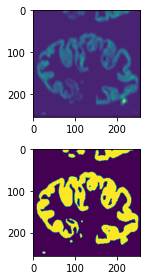

In [6]:
#######################
### 1. Thresholding ###
#######################
def threshold_segmentation(img, filename=None,  dirname='threshold'):
    #create empty image array 
    seg = np.zeros_like(img)
    #get threshold value
    threshold_value = threshold_otsu(img)
    #set all pixels that are >= otsu threshold value to 1 in seg image array 
    seg[ img >= threshold_value ] = 255

    # Save qc and segemented image
    if filename != None : save_output_images(img, seg, dirname, filename )

    return seg

### Segment with thresholding 
for filename, img in zip(image_filenames, images) :
  #if not filename in hard_images : continue
  print(filename)
  threshold_segmentation(img, filename)

### Excercise 1
# Other thresholding techniques make different cuts in the image histogram
# You can try them by changing "threshold_otsu" to: "threshold_li", 
# "threshold_yen", "threshold_mean", "threshold_minimum", "threshold_sauvola".

png/336_F.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/340_F.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/343_P.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/344_H.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/344_R.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/345_K.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/346_E.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/347_G.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/347_K.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/348_G.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/348_H.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/348_Q.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/349_E.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/349_F.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/349_I.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/349_K.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/350_K.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/350_M.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/350_P.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/351_E.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/351_F.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/351_G.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/351_O.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/351_P.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/352_D.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/352_H.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/352_J.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/352_K.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/352_T.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/353_A.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/353_C.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/353_D.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/353_F.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/353_H.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/353_J.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/353_T.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/354_D.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/354_F.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/354_G.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/354_H.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/354_K.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/354_O.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/354_Q.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/355_H.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/355_I.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/355_K.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/355_M.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/355_P.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/355_Q.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/355_R.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/355_T.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/356_D.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/356_E.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/356_G.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/356_H.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/356_K.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/356_T.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/357_D.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/357_E.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/357_F.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/357_H.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/357_J.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/357_K.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/357_T.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/358_B.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/358_E.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/358_F.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/358_G.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/358_J.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/358_M.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/358_R.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/358_T.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/359_D.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/359_E.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/359_F.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/359_G.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/359_H.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/359_J.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/359_K.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/359_O.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/359_Q.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/359_R.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/359_T.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/360_C.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/360_E.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/360_F.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/360_H.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/360_I.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/360_K.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/360_M.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/360_N.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/360_O.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/360_Q.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/360_S.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/360_T.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/361_B.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/361_C.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/361_D.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/361_E.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/361_F.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/361_H.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/361_J.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/361_N.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/361_P.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/361_Q.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/361_R.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/361_S.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/361_T.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/362_D.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/362_E.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/362_G.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/362_H.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/362_J.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/362_O.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/362_Q.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/362_R.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/362_T.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/363_E.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/363_F.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/363_G.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/363_H.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/363_I.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/363_J.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/363_K.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/363_M.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/363_N.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/363_O.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/363_R.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/363_T.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/364_A.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/364_C.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/364_D.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/364_E.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/364_F.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/364_G.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/364_H.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/364_J.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/364_K.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/364_O.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/364_T.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/365_A.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/365_C.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/365_D.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/365_E.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/365_F.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/365_H.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/365_J.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/365_K.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/365_O.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/365_P.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/365_Q.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/365_R.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/365_T.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/366_B.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/366_C.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/366_D.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/366_E.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/366_F.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/366_H.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/366_J.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/366_M.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/366_R.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/366_S.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/366_T.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/367_C.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/367_D.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/367_E.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/367_F.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/367_G.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/367_H.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/367_J.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/367_K.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/367_M.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/367_O.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/367_Q.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/367_T.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/368_A.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/368_B.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/368_C.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/368_D.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/368_E.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/368_F.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/368_G.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/368_H.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/368_J.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/368_M.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/368_N.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/368_R.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/368_T.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/369_B.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/369_D.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/369_G.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/369_H.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/369_J.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/369_K.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/369_N.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/369_O.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/369_Q.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/369_T.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/370_D.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/370_F.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/370_H.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/370_J.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/370_M.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/370_O.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/370_P.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/370_T.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/371_A.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/371_C.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/371_D.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/371_E.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/371_N.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/371_O.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/371_Q.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/371_R.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/372_A.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/372_C.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/372_F.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/372_G.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/372_H.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/372_J.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/372_K.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/373_C.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/373_E.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/373_F.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/373_H.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/373_J.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/373_K.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/373_O.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/374_H.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/374_J.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/374_R.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/375_B.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/375_E.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/375_J.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/375_R.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/376_O.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/377_C.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/377_J.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/378_B.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/378_E.png


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


png/379_B.png


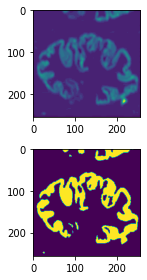

In [7]:
##################
### 2. K-Means ###
##################
def kmeans_segmentation(img,  filename=None, dirname='kmeans', save_output=True):
    #Set initial values for 2 classes. One value is equal to 0, 
    #the other is equal to image max pixel intensities
    init = np.array([0, img.max()]).reshape(-1,1)

    # setup clustering model
    model = KMeans(n_clusters=len(init), init=init)
    
    #img = resize(img, (64,64))
    #model = AgglomerativeClustering(linkage='ward') 

    # run model on the data
    seg = model.fit_predict(img.reshape(-1,1)).reshape(img.shape)

    #Resize image 
    img = resize(img.astype(np.uint8), (256,256))
    # Save qc and segemented image
    if filename != None : save_output_images(img, seg, dirname, filename )

    return seg

# Segment with K-Means #
for filename, img in zip(image_filenames, images) :
  #if not filename in hard_images : continue
  print(filename)
  kmeans_segmentation(img, filename)
  

### Excercise 2
#K-Means is only one of many possible clustering algorithms. You can try AgglomerativeClustering
#in the kmeans_segmentation function. Just uncomment where the AgglomerativeClustering model is defined
#and the line above it with "resize".


png/336_F.png


png/340_F.png


png/343_P.png


png/344_H.png


png/344_R.png


png/345_K.png


png/346_E.png


png/347_G.png


png/347_K.png


png/348_G.png


png/348_H.png


png/348_Q.png


png/349_E.png


png/349_F.png


png/349_I.png


png/349_K.png


png/350_K.png


png/350_M.png


png/350_P.png


png/351_E.png


png/351_F.png


png/351_G.png


png/351_O.png


png/351_P.png


png/352_D.png


png/352_H.png


png/352_J.png


png/352_K.png


png/352_T.png


png/353_A.png


png/353_C.png


png/353_D.png


png/353_F.png


png/353_H.png


png/353_J.png


png/353_T.png


png/354_D.png


png/354_F.png


png/354_G.png


png/354_H.png


png/354_K.png


png/354_O.png


png/354_Q.png


png/355_H.png


png/355_I.png


png/355_K.png


png/355_M.png


png/355_P.png


png/355_Q.png


png/355_R.png


png/355_T.png


png/356_D.png


png/356_E.png


png/356_G.png


png/356_H.png


png/356_K.png


png/356_T.png


png/357_D.png


png/357_E.png


png/357_F.png


png/357_H.png


png/357_J.png


png/357_K.png


png/357_T.png


png/358_B.png


png/358_E.png


png/358_F.png


png/358_G.png


png/358_J.png


png/358_M.png


png/358_R.png


png/358_T.png


png/359_D.png


png/359_E.png


png/359_F.png


png/359_G.png


png/359_H.png


png/359_J.png


png/359_K.png


png/359_O.png


png/359_Q.png


png/359_R.png


png/359_T.png


png/360_C.png


png/360_E.png


png/360_F.png


png/360_H.png


png/360_I.png


png/360_K.png


png/360_M.png


png/360_N.png


png/360_O.png


png/360_Q.png


png/360_S.png


png/360_T.png


png/361_B.png


png/361_C.png


png/361_D.png


png/361_E.png


png/361_F.png


png/361_H.png


png/361_J.png


png/361_N.png


png/361_P.png


png/361_Q.png


png/361_R.png


png/361_S.png


png/361_T.png


png/362_D.png


png/362_E.png


png/362_G.png


png/362_H.png


png/362_J.png


png/362_O.png


png/362_Q.png


png/362_R.png


png/362_T.png


png/363_E.png


png/363_F.png


png/363_G.png


png/363_H.png


png/363_I.png


png/363_J.png


png/363_K.png


png/363_M.png


png/363_N.png


png/363_O.png


png/363_R.png


png/363_T.png


png/364_A.png


png/364_C.png


png/364_D.png


png/364_E.png


png/364_F.png


png/364_G.png


png/364_H.png


png/364_J.png


png/364_K.png


png/364_O.png


png/364_T.png


png/365_A.png


png/365_C.png


png/365_D.png


png/365_E.png


png/365_F.png


png/365_H.png


png/365_J.png


png/365_K.png


png/365_O.png


png/365_P.png


png/365_Q.png


png/365_R.png


png/365_T.png


png/366_B.png


png/366_C.png


png/366_D.png


png/366_E.png


png/366_F.png


png/366_H.png


png/366_J.png


png/366_M.png


png/366_R.png


png/366_S.png


png/366_T.png


png/367_C.png


png/367_D.png


png/367_E.png


png/367_F.png


png/367_G.png


png/367_H.png


png/367_J.png


png/367_K.png


png/367_M.png


png/367_O.png


png/367_Q.png


png/367_T.png


png/368_A.png


png/368_B.png


png/368_C.png


png/368_D.png


png/368_E.png


png/368_F.png


png/368_G.png


png/368_H.png


png/368_J.png


png/368_M.png


png/368_N.png


png/368_R.png


png/368_T.png


png/369_B.png


png/369_D.png


png/369_G.png


png/369_H.png


png/369_J.png


png/369_K.png


png/369_N.png


png/369_O.png


png/369_Q.png


png/369_T.png


png/370_D.png


png/370_F.png


png/370_H.png


png/370_J.png


png/370_M.png


png/370_O.png


png/370_P.png


png/370_T.png


png/371_A.png


png/371_C.png


png/371_D.png


png/371_E.png


png/371_N.png


png/371_O.png


png/371_Q.png


png/371_R.png


png/372_A.png


png/372_C.png


png/372_F.png


png/372_G.png


png/372_H.png


png/372_J.png


png/372_K.png


png/373_C.png


png/373_E.png


png/373_F.png


png/373_H.png


png/373_J.png


png/373_K.png


png/373_O.png


png/374_H.png


png/374_J.png


png/374_R.png


png/375_B.png


png/375_E.png


png/375_J.png


png/375_R.png


png/376_O.png


png/377_C.png


png/377_J.png


png/378_B.png


png/378_E.png


png/379_B.png


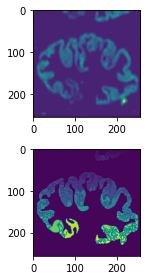

In [8]:
####################
### 3. Watershed ###
####################
def watershed_segmentation(img, filename=None, dirname='watershed', n_points=10, perc_max=90, save_output=True):
    #define the voxels to use as seeds for the watershed algorithm
    #in this case, we are finding which voxels are >= 90th percentile
    #of image intensities
    x, y = np.where(img >= np.percentile(img,[perc_max])[0])
   
    # create a list of the index values for the x and y vectors
    i = np.arange(x.shape[0]).astype(int)
   
    # shuffle that list of index values around. this is not necessary
    # but is just done to illustrate variability in segementation stemming
    # from which seed points are selected
    np.random.shuffle(i)

    # create empty array
    mask = np.zeros_like(img).astype(int)
    # use the first n_points in the x and y vectors as seed points
    mask[ x[i][0:n_points], y[i][0:n_points] ] = 1
    # the "label" function will set a unique label for each seed point
    mask, n = label(mask)

    # Convert image from 2D greyscale image to a 2D 3-channel RGB image 
    img2 = np.rint(np.repeat(img[:, :, np.newaxis]*255, 3, axis=2)).astype(np.uint8) 
    
    # Apply watershed segmentation on negative of image with seed points defined in mask
    seg = cv2.watershed(-img2,mask)
    
    # Save qc and segemented image
    if filename != None : save_output_images(img, seg, dirname, filename)

    return seg

# Segment with watershed method #
for filename, img in zip(image_filenames, images) :
  #if not filename in hard_images : continue
  print(filename)
  watershed_segmentation(img, filename, n_points=2000, perc_max=95)

### Excercise 3
# Watershed segmentation depends on specifying certain seed points.
# At the moment, the code selects 10 random seed points in the top
# 10 percentile of pixel intensities. You can try changing n_points
# and perc_max. 

In [9]:
# Run this cell before using the neural network example.
# Don't worry about understanding it unless you want to dive into the nitty gritty details.

import numpy as np
import imageio
import os
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Input, Add, Multiply, Dense, MaxPooling3D, BatchNormalization, Reshape
from tensorflow.keras.layers import Conv1D, Conv2D, Conv3D, Convolution2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import ZeroPadding3D, ZeroPadding2D, ZeroPadding1D, UpSampling2D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import LeakyReLU, MaxPooling2D, concatenate,Conv2DTranspose, Concatenate, ZeroPadding2D
from tensorflow.keras.activations import relu
from tensorflow.keras.callbacks import History, ModelCheckpoint
from math import sqrt
from glob import glob

from tensorflow.keras import backend as K

def make_unet(example_image):
    image_dim  = imageio.imread(example_image).shape[0:2]
    nlabels=2
    
    IN = Input(shape=(image_dim[0], image_dim[1],1))
    
    conv1 = Conv2D(8*2, (3, 3), activation='relu', padding='same')(IN)
    conv1 = Conv2D(8*2, (3, 3), activation='relu', padding='same')(conv1)
    conv1 = Dropout(0.1)(conv1)
    pool1 = MaxPooling2D((2, 2),padding='same')(conv1) 
 
    conv2 = Convolution2D(16*2, (3,3), activation='relu', padding='same')(pool1)
    conv2 = Convolution2D(16*2, (3,3), activation='relu', padding='same')(conv2)
    conv2 = Dropout(0.1)(conv2)
    pool2 = MaxPooling2D((2, 2),padding='same')(conv2) 

    conv3 = Convolution2D(32*2, (3,3), activation='relu', padding='same')(pool2)
    conv3 = Convolution2D(32*2, (3,3), activation='relu', padding='same')(conv3)
    conv3 = Dropout(0.1)(conv3)
    pool3 = MaxPooling2D((2, 2),padding='same')(conv3) 

    conv4 = Convolution2D(64*2, (3,3), activation='relu', padding='same')(pool3) 
    conv4 = Convolution2D(64*2, (3,3), activation='relu', padding='same')(conv4) 
    conv4 = Dropout(0.1)(conv4)
    pool4 = MaxPooling2D((2, 2),padding='same')(conv4) 
 
    conv5 = Convolution2D(128*2, (3,3), activation='relu', padding='same')(pool4) 
    conv5 = Convolution2D(128*2, (3,3), activation='relu', padding='same')(conv5) 
    conv5 = Dropout(0.1)(conv5)
    
    up5 = UpSampling2D((2, 2))(conv5)  
    conc5 = Concatenate(axis=3)([up5, conv4]) 
    conv6 = Convolution2D(64*2, (3,3), activation='relu', padding='same')(conc5)
    conv6 = Convolution2D(64*2, (3,3), activation='relu', padding='same')(conv6)
    conv6 = Dropout(0.1)(conv6)

    up6 = UpSampling2D(size=(2, 2))(conv6)
    conc6 = Concatenate(axis=3)([up6, conv3])
    conv7 = Convolution2D(32*2, (3,3), activation='relu', padding='same')(up6)
    conv7 = Convolution2D(32*2, (3,3), activation='relu', padding='same')(conv7)
    conv7 = Dropout(0.1)(conv7)

    up7 = UpSampling2D(size=(2, 2))(conv7)
    conc7 = Concatenate(axis=3)([up7, conv2])
    conv8 = Convolution2D(16*2, (3,3), activation='relu', padding='same')(conc7) 
    conv8 = Convolution2D(16*2, (3,3), activation='relu', padding='same')(conv8)
    conv8 = Dropout(0.1)(conv8)

    #up8 = Conv2DTranspose( filters=16*2, kernel_size=(3,3), strides=(2, 2), padding='same')(conv8)
    up8 = UpSampling2D(size=(2, 2))(conv8)
    conc8 = Concatenate(axis=3)([up8, conv1])
    conv9 = Convolution2D(8*2, (3,3), activation='relu', padding='same')(conc8) 
    conv9 = Convolution2D(8*2, (3,3), activation='relu', padding='same')(conv9)
    conv9 = Dropout(0.1)(conv9)

    conv10 = Convolution2D(nlabels, (1, 1), activation='softmax')(conv9)

    model = keras.models.Model(inputs=[IN], outputs=conv10)
    print(model.summary())
    return model

def generator(source_dir, label_dir, bounds, batch_size=10):
    images =np.sort([ fn for fn in  glob(f'{source_dir}/*png') if not '_B' in fn ])
    labels =np.sort([ fn for fn in  glob(f'{label_dir}/seg_*png') if not '_B' in fn ])
    
    #if len(images) != len(labels) :
    #    print('Error: mismatch between number of images and number of labels. images:', len(images),'labels:', len(labels))

    img_dim = imageio.imread(images[0]).shape[0:2]
    i=int(bounds[0])
    while True :
        img_batch=np.zeros([batch_size, img_dim[0], img_dim[1], 1])
        lbl_batch=np.zeros([batch_size, img_dim[0], img_dim[1], 1])
        for ii in range(batch_size):
            img_fn, lbl_fn = images[i], labels[i]
            if os.path.basename(img_fn).split('_')[0] != os.path.basename(lbl_fn).split('_')[1] : 
                print('Error: source and label image dont match.', img_fn, lbl_fn)
                exit(0)

            if i + ii < bounds[1] :
                i = int(i +  ii )
            else : 
                i=int(bounds[0])

            img_batch[ii,:,:,0] = imageio.imread(img_fn)
            lbl_batch[ii,:,:,0] = imageio.imread(lbl_fn)

        lbl_batch[ lbl_batch >0 ] = 1
        lbl_batch = to_categorical(lbl_batch)

        yield img_batch, lbl_batch

In [ ]:
#########################
### 4. Neural Network ###
#########################
def neuralnetwork_segmentation(source_dir, label_dir, epochs=10):    
    #load input images
    images = glob(f'{source_dir}/*png')
    
    #create model based on unet architecture
    model = make_unet(images[0])

    #compile the model
    model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(0.0001), metrics=['categorical_accuracy'])

    #get the number of images that are not of type 'B'. the 'B' images will be saved
    #for testing the accuracy of the model
    n=len([fn for fn in images if not '_B' in fn ])
    #set number of of images that will be used to train the network to 70% of the total number of images
    n_train = np.rint(n*0.7)
    #set the number of images that will be used to validate the network to 30% of the total number of images
    n_val = np.rint(n*0.3)
    
    #fit model
    history = model.fit(
            generator(source_dir,label_dir,(0,n_train),10), 
            validation_data=generator(source_dir,label_dir,(n_train,n_train+n_val)), 
            validation_steps=np.ceil(n_val/10), epochs=epochs,steps_per_epoch=np.ceil(n_train/n)) 
    
    # for each image... 
    for i in range(len(images)) :
        #set image filename
        filename = images[i]
        #load image
        img = imageio.imread(filename)
        #apply model to image
        seg = model.predict(img.reshape(1,img.shape[0],img.shape[1],1) , batch_size = 1)
        # model produces an array with two probability values for each pixel (prob that pixel is background / pixel is tissue)
        # the "argmax" function returns 0 for pixels that are more likely to be background and 1 for pixels that a more likely to be tissue
        seg = np.argmax(seg, axis=3).reshape(img.shape)
        #save the output image
        save_output_images(img, np.array(seg * 255).astype(np.uint8), 'neuralnetwork', filename)


# Segment with Neural Network #
neuralnetwork_segmentation('png', 'kmeans', epochs=10)
### Excercise 4
# Try and improve the performance of the model by changing the number of kernels, the size of the kernels, 
# the number of epochs, the dropout rate, etc. 

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 16) 160         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 16) 2320        conv2d[0][0]                     
__________________________________________________________________________________________________
dropout (Dropout)               (None, 256, 256, 16) 0           conv2d_1[0][0]                   
______________________________________________________________________________________________